In [15]:
import numpy as np
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn import Executor

from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn.qnn.lowlevel_qnn_qiskit import LowLevelQNN

import pennylane as qml
import pennylane.numpy as pnp

In [16]:
pqc = ChebyshevRx(2,2)
obs1 = SummedPaulis(2)
obs2 = SummedPaulis(2)
obs3 = SummedPaulis(2)

np.random.seed(0)
param = np.random.rand(pqc.num_parameters)
param_obs = np.random.rand(obs1.num_parameters+obs2.num_parameters)

qnn = LowLevelQNNPennyLane(pqc, [obs1,obs2], None)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>]
self._pennylane_gates_param_function [(<function _lambdifygenerated at 0x000001281DC501F0>,), (<function _lambdifygenerated at 0x000001281DBF4E50>,), (<function _lambdifygenerated at 0x000001281DC529E0>,), (<function _lambdifygenerated at 0x000001281DC51900>,), None]
self._pennylane_gates_wires [[0], [1], [0], [1], [0, 1]]
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']


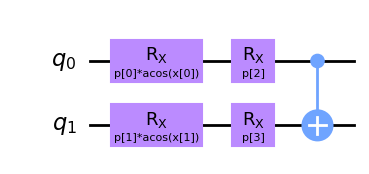

In [17]:
pqc.draw()

In [18]:
xx = [[0.5,0.7],[0.6,0.8]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=True).transpose()
p_ = pnp.array(p_,requires_grad=False).transpose()
q_ = pnp.array(q_,requires_grad=False).transpose()



val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_features)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [tensor([0.5488135 , 0.5488135 , 1.09762701, 1.09762701, 0.5488135 ,
        0.5488135 , 1.09762701, 1.09762701], requires_grad=False), tensor([0.71518937, 0.71518937, 1.43037873, 1.43037873, 0.71518937,
        0.71518937, 1.43037873, 1.43037873], requires_grad=False), tensor([0.60276338, 0.60276338, 1.20552675, 1.20552675, 0.60276338,
        0.60276338, 1.20552675, 1.20552675], requires_grad=False), tensor([0.54488318, 0.54488318, 1.08976637, 1.08976637, 0.54488318,
        0.54488318, 1.08976637, 1.08976637], requires_grad=False), <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DE7D580>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DE7EBC0>]
vall [[[ 0.4910911   0.9821822   0.33985559  0.67971118  0.54144795
    1.0828959   0.50117371  1.00234742]
  [ 0.15071368  0.30142737 -0.49024426 -0.98048852  0.19514201
    0.39028401 -0.57326708 -1.14653415]]

 

In [19]:
qnn_qiskit = LowLevelQNN(pqc, [obs1,obs2], Executor())

In [20]:
val = qnn_qiskit.evaluate([[0.5,0.7],[0.6,0.8]],[param,2*param],[param_obs,2*param_obs],"dfdx")["dfdx"]
print(val)
print(val.shape)

[[[[[ 0.4910911   0.15071368]
    [ 0.66310331  0.13206484]]

   [[ 0.9821822   0.30142737]
    [ 1.32620663  0.26412968]]]


  [[[ 0.33985559 -0.49024426]
    [ 0.65465583 -0.42958295]]

   [[ 0.67971118 -0.98048852]
    [ 1.30931166 -0.85916589]]]]



 [[[[ 0.54144795  0.19514201]
    [ 0.71901987  0.17099574]]

   [[ 1.0828959   0.39028401]
    [ 1.43803974  0.34199147]]]


  [[[ 0.50117371 -0.57326708]
    [ 0.87269299 -0.50233278]]

   [[ 1.00234742 -1.14653415]
    [ 1.74538598 -1.00466555]]]]]
(2, 2, 2, 2, 2)


In [21]:
qnn_pl = LowLevelQNNPennyLane(pqc, [obs1,obs2], Executor())
val = qnn_pl.evaluate([[0.5,0.7],[0.6,0.8]],[param,2*param],[param_obs,2*param_obs],"dfdx")["dfdx"]
print(val)
print(val.shape)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>]
self._pennylane_gates_param_function [(<function _lambdifygenerated at 0x000001281DE208B0>,), (<function _lambdifygenerated at 0x000001281DEB5EA0>,), (<function _lambdifygenerated at 0x000001281DE20A60>,), (<function _lambdifygenerated at 0x000001281DE22290>,), None]
self._pennylane_gates_wires [[0], [1], [0], [1], [0, 1]]
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [tensor(0.5488135, requires_grad=False), tensor(0.71518937, requires_grad=False), tensor(0.60276338, requires_grad=False), tensor(0.54488318, re

In [22]:
xx = [[0.5,0.7],[0.6,0.8]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=False).transpose()
p_ = pnp.array(p_,requires_grad=True).transpose()
q_ = pnp.array(q_,requires_grad=False).transpose()

val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_parameters)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [<autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DD04740>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DD069C0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DD046C0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DD06980>, tensor([0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6], requires_grad=False), tensor([0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8], requires_grad=False)]
vall [[[-0.81151495 -1.6230299  -0.28080115 -0.5616023  -0.73188009
   -1.46376017 -0.33872052 -0.67744103]
  [-0.11970207 -0.23940415  0.19468456  0.38936912 -0.10534896
   -0.21069793  0.15474139  0.30948279]
  [-0.77493969 -1.54987939 -0.26814535 -0.5362907  -0.7892633
   -1.5785266  -0.36527797 -0.73055594]
  [-0.15049315 -0.3009863   0.24476345  0.48952689 -0.16371217
   -0.32742434  0.24046795  0.48093591]]

 [[-1.09576054 -2.19152109 -0.54090065 -1.08180131 -0.9719

In [23]:
qnn_qiskit = LowLevelQNN(pqc, [obs1,obs2], Executor())
val = qnn_qiskit.evaluate([[0.5,0.7],[0.6,0.8]],[param,2*param],[param_obs,2*param_obs],"dfdp")["dfdp"]
print(val)
print(val.shape)

[[[[[-0.81151495 -0.11970207 -0.77493969 -0.15049315]
    [-1.09576054 -0.10489051 -1.04637424 -0.13187159]]

   [[-1.6230299  -0.23940415 -1.54987939 -0.3009863 ]
    [-2.19152109 -0.20978102 -2.09274848 -0.26374318]]]


  [[[-0.28080115  0.19468456 -0.26814535  0.24476345]
    [-0.54090065  0.17059489 -0.51652208  0.21447717]]

   [[-0.5616023   0.38936912 -0.5362907   0.48952689]
    [-1.08180131  0.34118978 -1.03304415  0.42895435]]]]



 [[[[-0.73188009 -0.10534896 -0.7892633  -0.16371217]
    [-0.97190566 -0.09231341 -1.04810813 -0.14345493]]

   [[-1.46376017 -0.21069793 -1.5785266  -0.32742434]
    [-1.94381132 -0.18462681 -2.09621627 -0.28690986]]]


  [[[-0.33872052  0.15474139 -0.36527797  0.24046795]
    [-0.5898135   0.13559417 -0.63605796  0.21071319]]

   [[-0.67744103  0.30948279 -0.73055594  0.48093591]
    [-1.179627    0.27118834 -1.27211591  0.42142638]]]]]
(2, 2, 2, 2, 4)


In [24]:
qnn_pl = LowLevelQNNPennyLane(pqc, [obs1,obs2], Executor())
val = qnn_pl.evaluate([[0.5,0.7],[0.6,0.8]],[param,2*param],[param_obs,2*param_obs],"dfdp")["dfdp"]
print(val)
print(val.shape)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>]
self._pennylane_gates_param_function [(<function _lambdifygenerated at 0x000001281DE22D40>,), (<function _lambdifygenerated at 0x000001281DE21240>,), (<function _lambdifygenerated at 0x000001281DE23BE0>,), (<function _lambdifygenerated at 0x000001281DDE2050>,), None]
self._pennylane_gates_wires [[0], [1], [0], [1], [0, 1]]
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [<autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DA26F40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DA244C0>, <autogr

In [25]:
val = qnn_qiskit.evaluate([0.5,0.7],[param,2*param],param_obs,"dfdpdp")["dfdpdp"]
print(val)
print(val.shape)

[[[[-0.35262067  0.30209787 -0.33672794  0.37980679]
   [ 0.30209787 -0.04682309  0.28848222 -0.05886743]
   [-0.33672794  0.28848222 -0.32155149  0.36268876]
   [ 0.37980679 -0.05886743  0.36268876 -0.07400996]]

  [[-0.47613149  0.26471721 -0.45467208  0.33281067]
   [ 0.26471721 -0.04102934  0.25278632 -0.05158336]
   [-0.45467208  0.25278632 -0.43417985  0.31781078]
   [ 0.33281067 -0.05158336  0.31781078 -0.06485219]]]


 [[[ 0.29332861  0.20437756  0.28010819  0.25694978]
   [ 0.20437756 -0.1193625   0.19516619 -0.15006623]
   [ 0.28010819  0.19516619  0.26748362  0.24536897]
   [ 0.25694978 -0.15006623  0.24536897 -0.1886679 ]]

  [[ 0.565032    0.17908851  0.53956582  0.22515561]
   [ 0.17908851 -0.10459295  0.17101693 -0.1314975 ]
   [ 0.53956582  0.17101693  0.5152474   0.21500777]
   [ 0.22515561 -0.1314975   0.21500777 -0.16532272]]]]
(2, 2, 4, 4)


In [26]:
qnn_pl = LowLevelQNNPennyLane(pqc, [obs1,obs2], Executor())
val = qnn_pl.evaluate([0.5,0.7],[param,2*param],param_obs,"dfdpdp")["dfdpdp"]
print(val)
print(val.shape)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>]
self._pennylane_gates_param_function [(<function _lambdifygenerated at 0x000001281DE22EF0>,), (<function _lambdifygenerated at 0x000001281DE21E10>,), (<function _lambdifygenerated at 0x000001281DE22440>,), (<function _lambdifygenerated at 0x000001281DDE1CF0>,), None]
self._pennylane_gates_wires [[0], [1], [0], [1], [0, 1]]
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [<autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DDCB980>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x000001281DDC8F00>, <autogr

In [27]:
xx = [[0.5,0.7],[0.6,0.8]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=False).transpose()
p_ = pnp.array(p_,requires_grad=False).transpose()
q_ = pnp.array(q_,requires_grad=True).transpose()

val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_parameters_observable)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [tensor([0.5488135 , 0.5488135 , 1.09762701, 1.09762701, 0.5488135 ,
        0.5488135 , 1.09762701, 1.09762701], requires_grad=False), tensor([0.71518937, 0.71518937, 1.43037873, 1.43037873, 0.71518937,
        0.71518937, 1.43037873, 1.43037873], requires_grad=False), tensor([0.60276338, 0.60276338, 1.20552675, 1.20552675, 0.60276338,
        0.60276338, 1.20552675, 1.20552675], requires_grad=False), tensor([0.54488318, 0.54488318, 1.08976637, 1.08976637, 0.54488318,
        0.54488318, 1.08976637, 1.08976637], requires_grad=False), tensor([0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6], requires_grad=False), tensor([0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8], requires_grad=False)]
vall [[[ 1.          1.          1.          1.          1.
    1.          1.          1.        ]
  [ 0.38325405  0.38325405 -0.70623267 -0.70623267  0.44316014
    0.44316014 -0.60721818 -0.60721818]
  [ 0

In [28]:
val = qnn_qiskit.evaluate([[0.5,0.7],[0.6,0.8]],[param,2*param],[param_obs,2*param_obs],"dfdop")["dfdop"]
print(val)
print(val.shape)

[[[[[ 1.          0.38325405  0.16913191  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.38325405
      0.16913191]]

   [[ 1.          0.38325405  0.16913191  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.38325405
      0.16913191]]]


  [[[ 1.         -0.70623267  0.43115497  0.          0.
      0.        ]
    [ 0.          0.          0.          1.         -0.70623267
      0.43115497]]

   [[ 1.         -0.70623267  0.43115497  0.          0.
      0.        ]
    [ 0.          0.          0.          1.         -0.70623267
      0.43115497]]]]



 [[[[ 1.          0.44316014  0.2375324   0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.44316014
      0.2375324 ]]

   [[ 1.          0.44316014  0.2375324   0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.44316014
      0.2375324 ]]]


  [[[ 1.         -0.60721818  0.